Data preparation completed successfully.
Model Evaluation:
Mean Squared Error: 2.476201940642365
R-squared: 0.7342212162359103
Anomalous data points:
       climate_temperature  climate_humidity  device_humidity
1117                 29.5              0.67             0.69
543                  27.0              0.84             0.68
900                  29.0              0.76             0.73
308                  32.0              0.63             0.75
70                   32.0              0.55             0.76
...                   ...               ...              ...
420                  26.0              0.94             0.79
78                   28.0              0.74             0.72
620                  33.0              0.63             0.79
497                  31.0              0.70             0.72
810                  26.0              0.94             0.75

[133 rows x 3 columns]
Anomalous data points saved successfully.


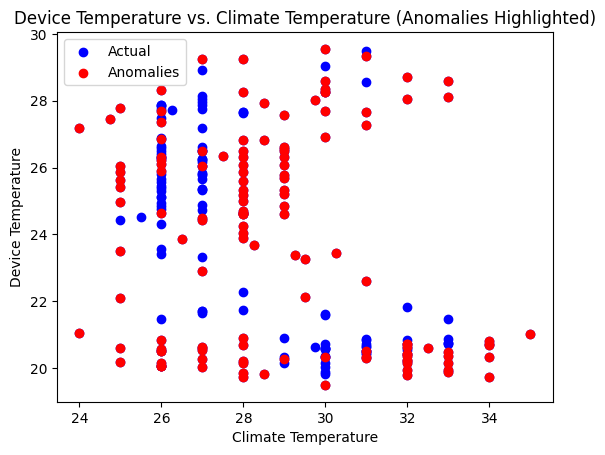

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = 'baseline_data.csv'
data = pd.read_csv(file_path)

# Ensure the dataset is clean and structured correctly
# (Additional data cleaning steps can be added here if necessary)

# Define features (X) and target (y)
X = data[['climate_temperature', 'climate_humidity', 'device_humidity']]
y = data['device_temperature']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data preparation completed successfully.")

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Evaluation:\nMean Squared Error: {mse}\nR-squared: {r2}")

# Calculate residuals (difference between actual and predicted values)
residuals = np.abs(y_test - y_pred)

# Define a threshold for anomalies (e.g., residuals greater than a certain value)
threshold = 1.0  # Adjust this value based on your criteria

# Identify anomalies
anomalies = residuals > threshold
anomalous_data = X_test[anomalies]

print("Anomalous data points:\n", anomalous_data)

# Save the anomalies to a CSV file
anomalous_data.to_csv('anomalous_data.csv', index=False)
print("Anomalous data points saved successfully.")

# Visualize the anomalies
plt.scatter(X_test['climate_temperature'], y_test, color='blue', label='Actual')
plt.scatter(X_test['climate_temperature'][anomalies], y_test[anomalies], color='red', label='Anomalies')
plt.xlabel('Climate Temperature')
plt.ylabel('Device Temperature')
plt.legend()
plt.title('Device Temperature vs. Climate Temperature (Anomalies Highlighted)')
plt.show()


In [3]:
# Check environmental conditions for anomalies
anomalous_conditions = X_test[anomalies]
print("Environmental conditions for anomalies:\n", anomalous_conditions)


Environmental conditions for anomalies:
       climate_temperature  climate_humidity  device_humidity
1117                 29.5              0.67             0.69
543                  27.0              0.84             0.68
900                  29.0              0.76             0.73
308                  32.0              0.63             0.75
70                   32.0              0.55             0.76
...                   ...               ...              ...
420                  26.0              0.94             0.79
78                   28.0              0.74             0.72
620                  33.0              0.63             0.79
497                  31.0              0.70             0.72
810                  26.0              0.94             0.75

[133 rows x 3 columns]
